In [47]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pathlib

In [64]:
data_dir = pathlib.Path('./processed_galaxy_data/processed_images')

In [66]:
image_count = len(list(data_dir.glob('**/*.jpg')))
image_count

243434

In [67]:
batch_size = 32
img_height = 50
img_width = 50

In [68]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory processed_galaxy_data\processed_images. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

# Testing

In [3]:
# load flattened images and labels
flattened_data = pd.read_csv("processed_galaxy_data/flattened_normalized_images.csv", header=None)
labels = pd.read_csv("processed_galaxy_data/labels_mappings_filtered.csv")

In [34]:
# Assuming y_train and y_test are your string label data
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels for training data
labels_encoded = label_encoder.fit_transform(labels['shape_label'])

# Number of classes
num_classes = len(label_encoder.classes_)

# Define class names
class_names = label_encoder.classes_

In [36]:
X_train, X_test, y_train, y_test = train_test_split(flattened_data, labels_encoded, train_size=0.8, random_state=42)

In [37]:
X_train_re = X_train.to_numpy().reshape(-1, 50, 50, 1)
X_test_re = X_test.to_numpy().reshape(-1, 50, 50, 1)

In [38]:
# following tensorflow guide
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [39]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_re, y_train, epochs=10, validation_data=(X_test_re, y_test))

Epoch 1/10
5990/5990 [==============================] - 113s 18ms/step - loss: 1.0652 - accuracy: 0.4056 - val_loss: 1.0623 - val_accuracy: 0.4090
Epoch 2/10
5990/5990 [==============================] - 105s 18ms/step - loss: 1.0632 - accuracy: 0.4031 - val_loss: 1.0632 - val_accuracy: 0.3993
Epoch 3/10
5990/5990 [==============================] - 107s 18ms/step - loss: 1.0625 - accuracy: 0.4064 - val_loss: 1.0632 - val_accuracy: 0.3993
Epoch 4/10
5990/5990 [==============================] - 105s 18ms/step - loss: 1.0625 - accuracy: 0.4038 - val_loss: 1.0617 - val_accuracy: 0.4090
Epoch 5/10
5990/5990 [==============================] - 105s 18ms/step - loss: 1.0623 - accuracy: 0.4047 - val_loss: 1.0620 - val_accuracy: 0.3993
Epoch 6/10
5990/5990 [==============================] - 119s 20ms/step - loss: 1.0622 - accuracy: 0.4043 - val_loss: 1.0616 - val_accuracy: 0.4090
Epoch 7/10
5990/5990 [==============================] - 111s 19ms/step - loss: 1.0622 - accuracy: 0.4051 - val_loss: 1

1498/1498 - 9s - loss: 1.0630 - accuracy: 0.4090 - 9s/epoch - 6ms/step


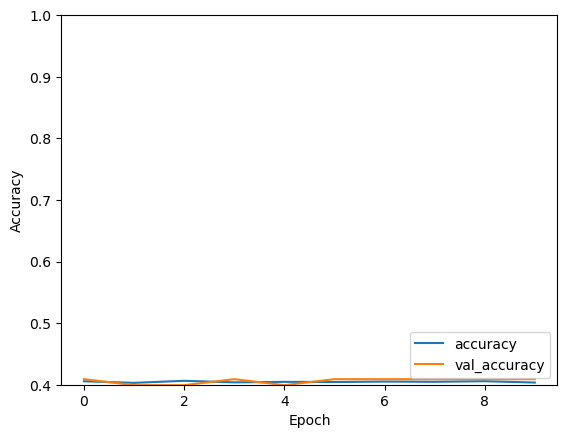

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_re, y_test, verbose=2)

In [ ]:
print(test_acc)